# <font color='magenta'>IRIS CLASSIFICATION</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris_data=pd.read_csv("D:\\MACHINE LAERNING\\IRIS.csv")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


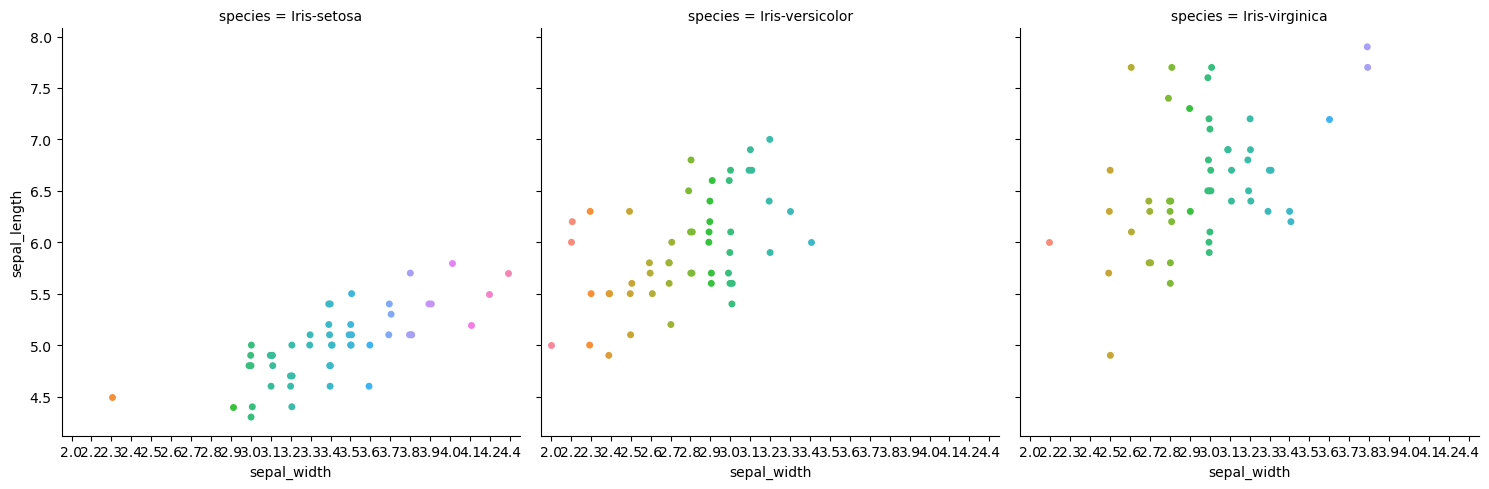

In [16]:
sns.catplot(data=iris_data,y='sepal_length',x='sepal_width',col='species')

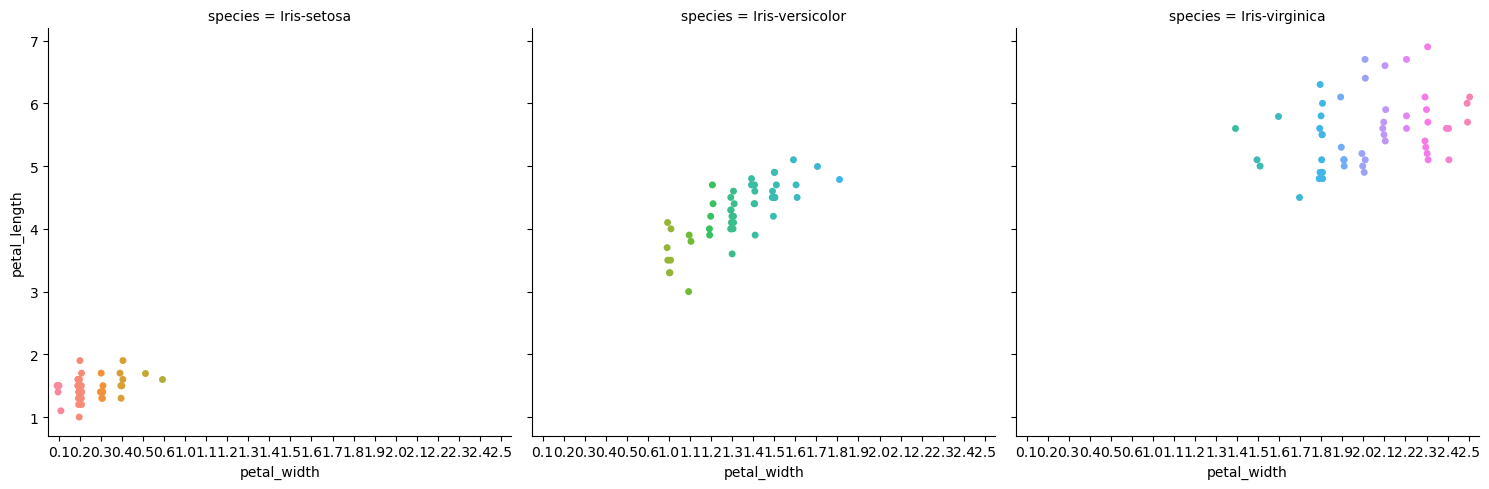

In [18]:
sns.catplot(data=iris_data,y='petal_length',x='petal_width',col='species')

<AxesSubplot:>

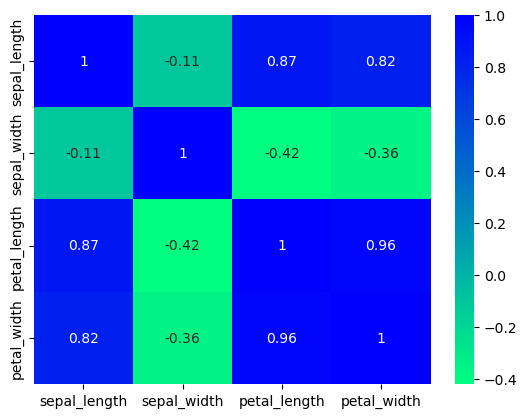

In [25]:
sns.heatmap(iris_data[['sepal_length','sepal_width', 'petal_length','petal_width']].corr(),annot=True,cmap='winter_r')

In [33]:
x=np.array(iris_data.iloc[ : ,: 4])
y=np.array(iris_data.iloc[: ,-1])

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)

In [44]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [46]:
x_train_predc=model.predict(x_train)
x_test_predc=model.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
cr_train=classification_report(y_train,x_train_predc)
cm_train=confusion_matrix(y_train,x_train_predc)
score_train=accuracy_score(y_train,x_train_predc)

In [53]:
cr_test=classification_report(y_test,x_test_predc)
cm_test=confusion_matrix(y_test,x_test_predc)
score_test=accuracy_score(y_test,x_test_predc)

In [56]:
print('THE TRAIN DATA')
print(f'THE ACCURACY SCORE={score_train}')
print(f'THE CONFUSSION MATRX=\n{cm_train}')
print(f'THE CLASSIFICATION REPORT\n{cr_train}\n\n')
print('THE TEST DATA')
print(f'THE ACCURACY SCORE={score_test}')
print(f'THE CONFUSSION MATRX=\n{cm_test}')
print(f'THE CLASSIFICATION REPORT\n{cr_test}\n\n')

THE TRAIN DATA
THE ACCURACY SCORE=0.975
THE CONFUSSION MATRX=
[[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]
THE CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120



THE TEST DATA
THE ACCURACY SCORE=1.0
THE CONFUSSION MATRX=
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
THE CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00 